In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from os.path import join

Index(['step', 'Average Q', 'Epsilon', 'Latest 100 avg reward (clipped)',
       'Loss', 'Reward (clipped)', 'Test score', 'Total Frames'],
      dtype='object')


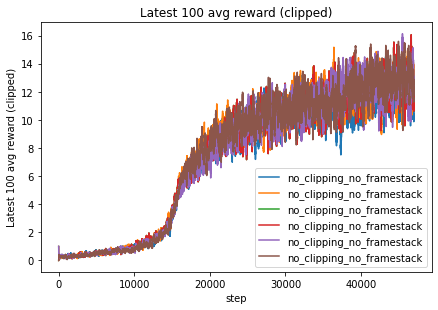

In [46]:
path = './exp_result/processed'

files_dict = dict()
for file in os.listdir(path):
    name = file.split('.')[0]
    csv = pd.read_csv(join(path, file))[:47000]
    files_dict[name] = csv
keys = list(files_dict.keys())
features = list(files_dict.values())[0].columns
    
ax = plt.axes()
for k, v in files_dict.items():
    #v.fillna(method='ffill', inplace=True)
    ax.plot(v['step'], v[idx], label=name)
ax.legend()
plt.tight_layout()
ax.set(xlabel='step', ylabel=idx, title=idx);

In [128]:
def plot(d, keys, features, title=None, row=1):
    r, c = row, len(features)//row
    fig, axes = plt.subplots(r, c, squeeze=False, figsize=(c*10, r*6))
    for i in range(row):
        for j in range(len(features)//row):
            for k in keys:
                axes[i, j].plot(d[k]['step'], d[k][features[i*row + j]], label=k, linewidth=1)
            #plt.xscale('logit')
            axes[i, j].legend()
            
            axes[i, j].set(xlabel='step', ylabel=features[i*row + j])
            if title is None:
                axes[i, j].set_title(features[i*row + j])
            else:
                axes[i, j].set_title(title[i*row + j])
    plt.tight_layout()

In [109]:
print(keys)
print(features)

['no_clipping', 'original_exp', 'duel_exp', 'original_stack8_exp', 'original_stack16_exp', 'no_clipping_no_framestack']
Index(['step', 'Average Q', 'Epsilon', 'Latest 100 avg reward (clipped)',
       'Loss', 'Reward (clipped)', 'Test score', 'Total Frames'],
      dtype='object')


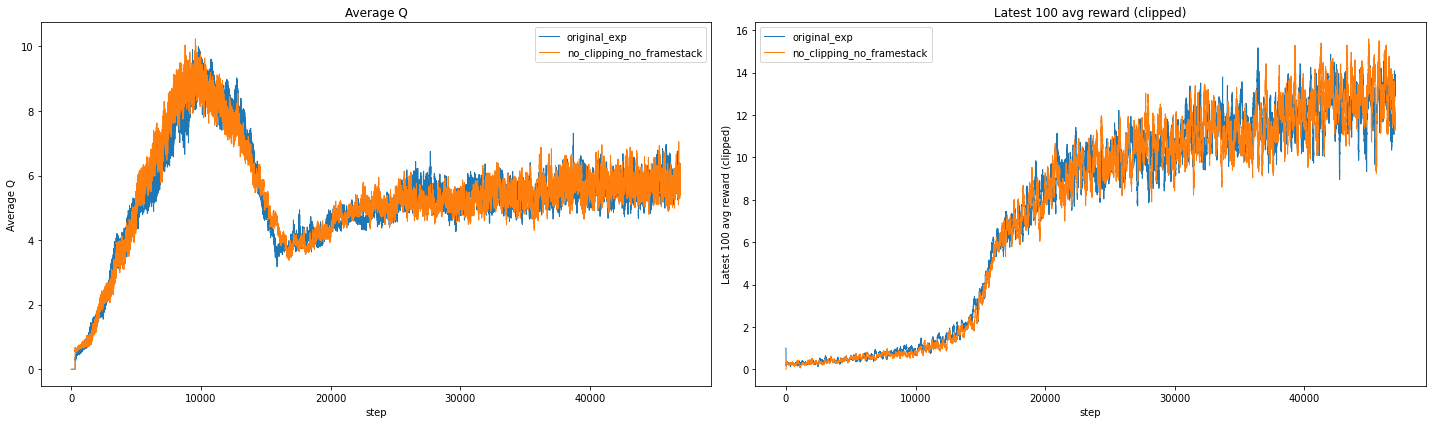

In [136]:
k_i = [1, 5]
f_i = [1,3]
plot(files_dict, [keys[x] for x in k_i], [features[x] for x in f_i])